<a href="https://colab.research.google.com/github/arezyhs/Python-KNN-NaiveBayes-MLP/blob/main/knn_mlp_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import library yang dibutuhkan
import numpy as np
import struct
import gzip
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
import time  # untuk menghitung waktu pelatihan dan prediksi

# Fungsi untuk membaca file gambar MNIST
def load_mnist_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    return images

# Fungsi untuk membaca file label MNIST
def load_mnist_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Memuat dataset MNIST (ubah path sesuai tempat Anda menyimpan dataset)
train_images = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')
test_images = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

# Menampilkan dimensi dataset
print(f"Train Images Shape: {train_images.shape}")
print(f"Train Labels Shape: {train_labels.shape}")
print(f"Test Images Shape: {test_images.shape}")
print(f"Test Labels Shape: {test_labels.shape}")

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [4]:
# Pra-pemrosesan: Reshape data menjadi vektor 1D dan normalisasi
train_images_flat = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images_flat = test_images.reshape(test_images.shape[0], -1) / 255.0

# Membagi data pelatihan menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(train_images_flat, train_labels, test_size=0.2, random_state=42)

In [5]:
# ----------------------
# Model KNN
# ----------------------

print("\nMelatih model KNN...")

# Mengukur waktu pelatihan
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_training_time = time.time() - start_time

# Mengukur waktu prediksi
start_time = time.time()
y_test_pred_knn = knn.predict(test_images_flat)
knn_prediction_time = time.time() - start_time

# Evaluasi model KNN menggunakan data validasi
y_val_pred_knn = knn.predict(X_val)
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)

# Evaluasi model KNN menggunakan data uji
test_accuracy_knn = accuracy_score(test_labels, y_test_pred_knn)

# Metode evaluasi tambahan: Precision, Recall, F1-score
precision_knn = precision_score(test_labels, y_test_pred_knn, average='weighted')
recall_knn = recall_score(test_labels, y_test_pred_knn, average='weighted')
f1_knn = f1_score(test_labels, y_test_pred_knn, average='weighted')

# Menghitung confusion matrix untuk KNN
cm_knn = confusion_matrix(test_labels, y_test_pred_knn)

# Menampilkan hasil KNN
print(f"\nKNN Performance:")
print(f"Akurasi pada Data Uji: {test_accuracy_knn * 100:.2f}%")
print(f"Precision: {precision_knn * 100:.2f}%")
print(f"Recall: {recall_knn * 100:.2f}%")
print(f"F1-score: {f1_knn * 100:.2f}%")
print(f"Waktu Pelatihan: {knn_training_time:.4f} detik")
print(f"Waktu Prediksi: {knn_prediction_time:.4f} detik")


Melatih model KNN...

KNN Performance:
Akurasi pada Data Uji: 96.81%
Precision: 96.83%
Recall: 96.81%
F1-score: 96.80%
Waktu Pelatihan: 0.0320 detik
Waktu Prediksi: 36.5231 detik


In [6]:
# ----------------------
# Model MLP
# ----------------------

print("\nMelatih model MLP...")

# Mengukur waktu pelatihan
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, random_state=42, solver='adam', verbose=True)
mlp.fit(X_train, y_train)
mlp_training_time = time.time() - start_time

# Mengukur waktu prediksi
start_time = time.time()
y_test_pred_mlp = mlp.predict(test_images_flat)
mlp_prediction_time = time.time() - start_time

# Evaluasi model MLP menggunakan data validasi
y_val_pred_mlp = mlp.predict(X_val)
val_accuracy_mlp = accuracy_score(y_val, y_val_pred_mlp)

# Evaluasi model MLP menggunakan data uji
test_accuracy_mlp = accuracy_score(test_labels, y_test_pred_mlp)

# Metode evaluasi tambahan: Precision, Recall, F1-score
precision_mlp = precision_score(test_labels, y_test_pred_mlp, average='weighted')
recall_mlp = recall_score(test_labels, y_test_pred_mlp, average='weighted')
f1_mlp = f1_score(test_labels, y_test_pred_mlp, average='weighted')

# Menghitung confusion matrix untuk MLP
cm_mlp = confusion_matrix(test_labels, y_test_pred_mlp)

# Menampilkan hasil MLP
print(f"\nMLP Performance:")
print(f"Akurasi pada Data Uji: {test_accuracy_mlp * 100:.2f}%")
print(f"Precision: {precision_mlp * 100:.2f}%")
print(f"Recall: {recall_mlp * 100:.2f}%")
print(f"F1-score: {f1_mlp * 100:.2f}%")
print(f"Waktu Pelatihan: {mlp_training_time:.4f} detik")
print(f"Waktu Prediksi: {mlp_prediction_time:.4f} detik")


Melatih model MLP...
Iteration 1, loss = 0.45877092
Iteration 2, loss = 0.21910752
Iteration 3, loss = 0.16600304
Iteration 4, loss = 0.13386874
Iteration 5, loss = 0.11008644
Iteration 6, loss = 0.09274100
Iteration 7, loss = 0.07891697
Iteration 8, loss = 0.06758690
Iteration 9, loss = 0.05882468
Iteration 10, loss = 0.05184131


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Performance:
Akurasi pada Data Uji: 97.23%
Precision: 97.23%
Recall: 97.23%
F1-score: 97.23%
Waktu Pelatihan: 17.4396 detik
Waktu Prediksi: 0.0879 detik


In [7]:
# ----------------------
# Perbandingan Akurasi
# ----------------------
print("\nPerbandingan Akurasi:")
print(f"KNN Accuracy on Test Set: {test_accuracy_knn * 100:.2f}%")
print(f"MLP Accuracy on Test Set: {test_accuracy_mlp * 100:.2f}%")


Perbandingan Akurasi:
KNN Accuracy on Test Set: 96.81%
MLP Accuracy on Test Set: 97.23%


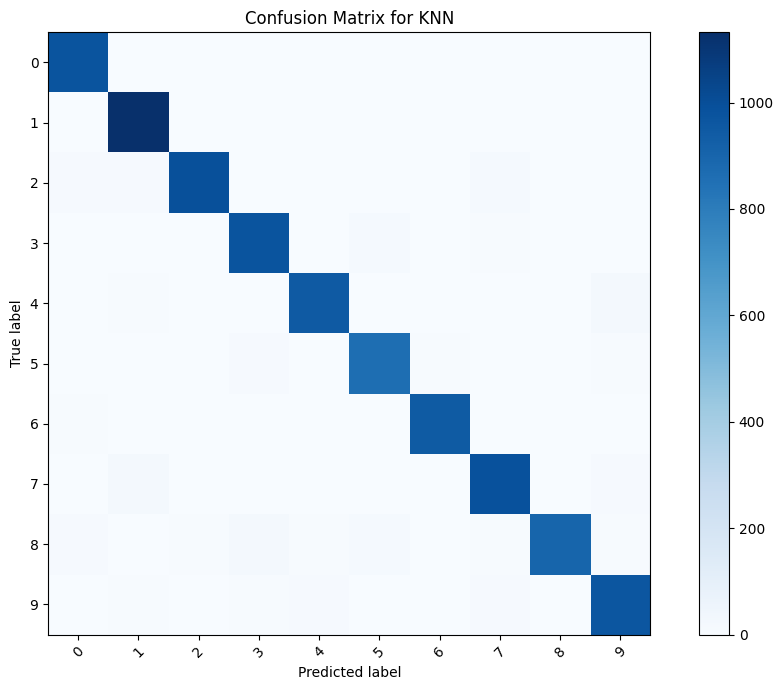

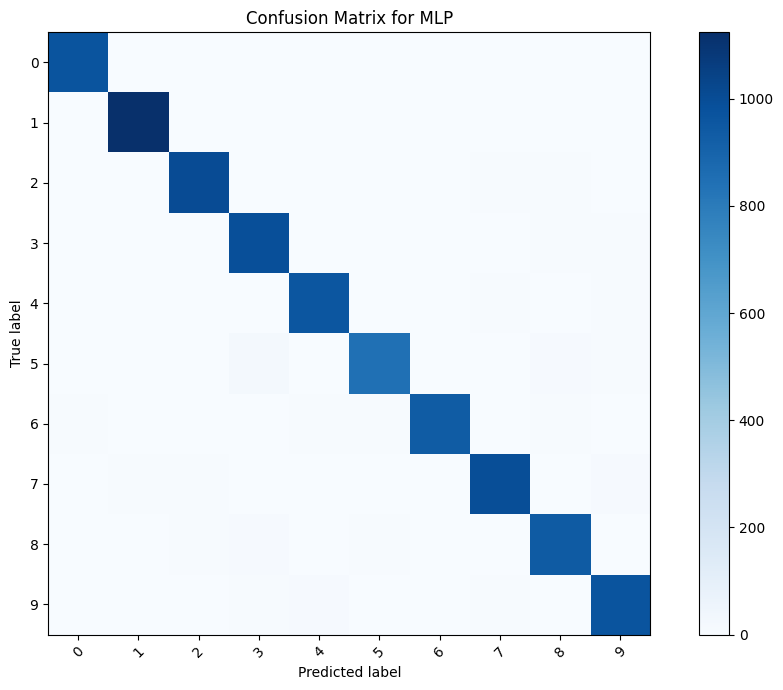

In [8]:
# ----------------------
# Visualisasi Confusion Matrix
# ----------------------

def plot_confusion_matrix(cm, model_name, classes):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

# Visualisasi confusion matrix untuk KNN
plot_confusion_matrix(cm_knn, 'KNN', classes=[str(i) for i in range(10)])

# Visualisasi confusion matrix untuk MLP
plot_confusion_matrix(cm_mlp, 'MLP', classes=[str(i) for i in range(10)])

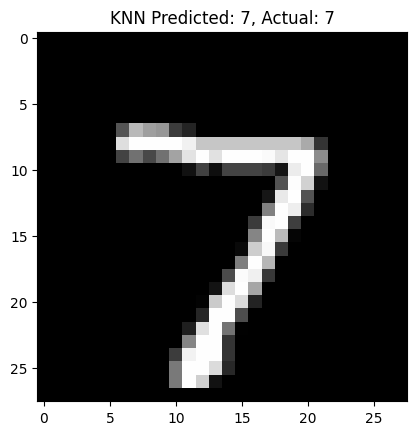

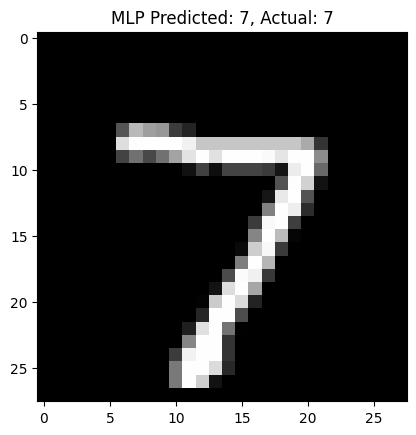

In [11]:
# ----------------------
# Visualisasi Gambar dan Prediksi
# ----------------------
index = 0  # Ganti indeks jika ingin melihat gambar lain

# Menampilkan gambar uji dan hasil prediksi KNN
plt.imshow(test_images[index], cmap='gray')
plt.title(f"KNN Predicted: {y_test_pred_knn[index]}, Actual: {test_labels[index]}")
plt.show()

# Menampilkan gambar uji dan hasil prediksi MLP
plt.imshow(test_images[index], cmap='gray')
plt.title(f"MLP Predicted: {y_test_pred_mlp[index]}, Actual: {test_labels[index]}")
plt.show()

In [12]:
# ----------------------
# Menyimpan Model (Opsional)
# ----------------------
joblib.dump(knn, 'knn_mnist_model.pkl')
joblib.dump(mlp, 'mlp_mnist_model.pkl')

# Menyimpan model ke dalam folder lokal
print("Model KNN dan MLP telah disimpan.")

Model KNN dan MLP telah disimpan.
